# **Submitted By: Mrinal Bhan (DSAI : 211020428)**

>Task 3 (CNN): <br>
Download/search handwritten digit dataset (MNIST Dataset). You are given the flexibility to use any other handwritten digit dataset if found suitable. <br>
Perform the following tasks without preprocessing:<br>
[1] Apply the convolution neural network architecture to the above dataset.<br>
[2] Demonstrate the results with various learning rates.<br>
[3] Demonstrate the results with various Activation functions.<br>
[4] Demonstrate the results with all possible evaluation criteria.<br>
[5] Demonstrate the learning results in all possible visualizing ways.<br>

In [2]:
import tensorflow as tf
import keras
from keras import backend as k
from tensorflow.keras import utils # For datasets # For math functions and array
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Precision, Recall


In [10]:
#Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train_categorical = utils.to_categorical(y_train)
y_test_categorical = utils.to_categorical(y_test)

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


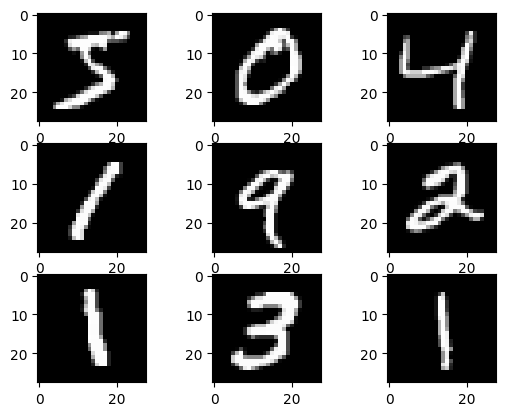

In [11]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

> [1] Apply the convolution neural network architecture to the above dataset.


In [21]:

inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) #layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3). 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) #layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3). 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) #layer3 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3). 
layer4 = Dropout(0.5)(layer3) #layer4 is showing Dropout at a rate of 0.5. 
layer5 = Flatten()(layer4) #layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6. 
layer6 = Dense(250, activation='sigmoid')(layer5) #layer6 is a hidden layer of a neural network containing 250 neurons. 
layer7 = Dense(10, activation='softmax')(layer6) #layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [26]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 40s 325ms/step - loss: 1.8089 - accuracy: 0.4174
Epoch 2/10
120/120 [==============================] - 40s 332ms/step - loss: 1.7529 - accuracy: 0.4494
Epoch 3/10
120/120 [==============================] - 38s 316ms/step - loss: 1.7044 - accuracy: 0.4740
Epoch 4/10
120/120 [==============================] - 39s 325ms/step - loss: 1.6573 - accuracy: 0.4971
Epoch 5/10
120/120 [==============================] - 38s 320ms/step - loss: 1.6107 - accuracy: 0.5203
Epoch 6/10
120/120 [==============================] - 38s 314ms/step - loss: 1.5682 - accuracy: 0.5389
Epoch 7/10
120/120 [==============================] - 38s 313ms/step - loss: 1.5293 - accuracy: 0.5543
Epoch 8/10
120/120 [==============================] - 38s 319ms/step - loss: 1.4865 - accuracy: 0.5752
Epoch 9/10
120/120 [==============================] - 38s 316ms/step - loss: 1.4510 - accuracy: 0.5880
Epoch 10/10
120/120 [==============================] - 39s 321ms/step - l

In [27]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1]*100)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                           

>  [2] Demonstrate the results with various learning rates.


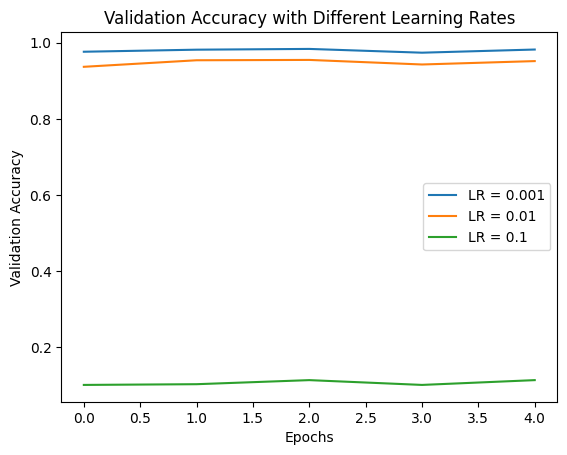

In [45]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print(x_test.shape)
# print(y_test.shape)
learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to test

for lr in learning_rates:
    # Define CNN architecture
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Plot accuracy for each learning rate
    plt.plot(history.history['val_accuracy'], label=f'LR = {lr}')

plt.title('Validation Accuracy with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
acc1 = history.history['val_accuracy']

> [3] Demonstrate the results with various Activation functions.<br>


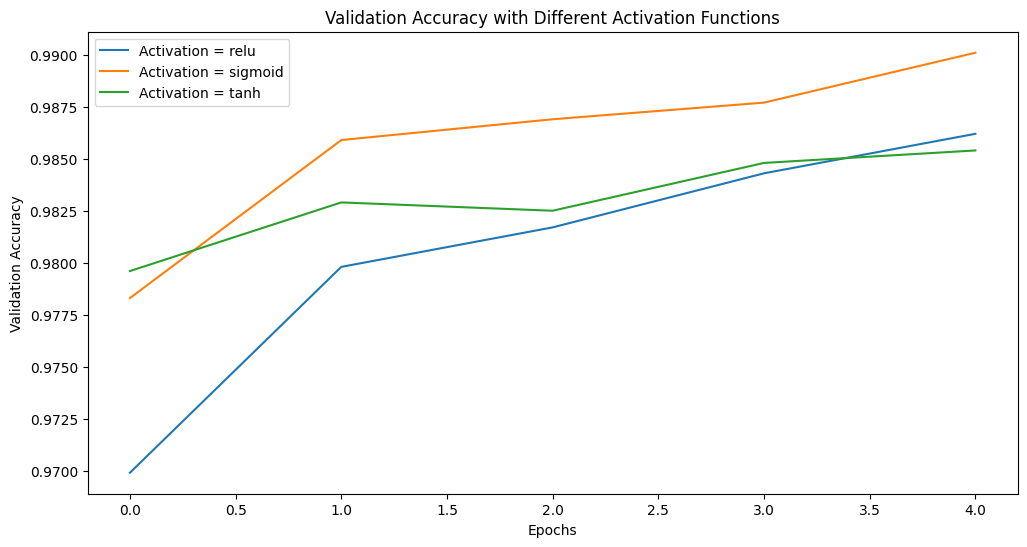

In [47]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Add channel dimension for CNN input
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

activation_functions = ['relu', 'sigmoid', 'tanh']

plt.figure(figsize=(12, 6))

for activation in activation_functions:
    # Define CNN architecture with the current activation function
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Plot validation accuracy for each activation function
    plt.plot(history.history['val_accuracy'], label=f'Activation = {activation}')

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

>  [4] Demonstrate the results with all possible evaluation criteria.

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes along axis 1
y_true = y_test  # Keep the true labels as they are

# Calculate evaluation metrics
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)], digits=4)
print(report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.9908    0.9918    0.9913       980
           1     0.9861    0.9982    0.9921      1135
           2     0.9865    0.9893    0.9879      1032
           3     0.9911    0.9871    0.9891      1010
           4     0.9808    0.9878    0.9843       982
           5     0.9854    0.9832    0.9843       892
           6     0.9824    0.9896    0.9860       958
           7     0.9941    0.9815    0.9878      1028
           8     0.9948    0.9825    0.9886       974
           9     0.9841    0.9832    0.9836      1009

    accuracy                         0.9876     10000
   macro avg     0.9876    0.9874    0.9875     10000
weighted avg     0.9876    0.9876    0.9876     10000



> [5] Demonstrate the learning results in all possible visualizing ways.


Epoch 1/10
120/120 [==============================] - 1s 8ms/step - loss: 175.8418 - accuracy: 0.1543 - val_loss: 164.7406 - val_accuracy: 0.1585
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 154.2967 - accuracy: 0.1696 - val_loss: 144.3174 - val_accuracy: 0.1747
Epoch 3/10
120/120 [==============================] - 1s 6ms/step - loss: 136.1447 - accuracy: 0.1842 - val_loss: 127.2395 - val_accuracy: 0.1871
Epoch 4/10
120/120 [==============================] - 1s 6ms/step - loss: 120.8824 - accuracy: 0.1958 - val_loss: 112.7741 - val_accuracy: 0.1978
Epoch 5/10
120/120 [==============================] - 1s 6ms/step - loss: 107.7293 - accuracy: 0.2036 - val_loss: 100.1964 - val_accuracy: 0.2061
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 96.2322 - accuracy: 0.2108 - val_loss: 89.2716 - val_accuracy: 0.2177
Epoch 7/10
120/120 [==============================] - 1s 6ms/step - loss: 86.2128 - accuracy: 0.2197 - val_loss: 79.8096 - val

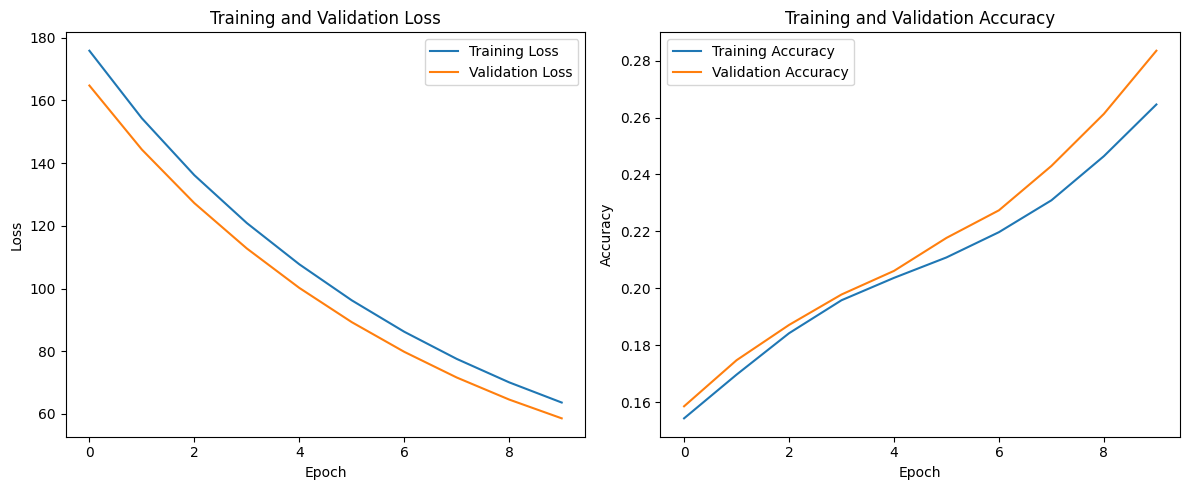

Test loss: 58.597923278808594
Test accuracy: 28.349998593330383


In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define input layer
inpx = Input(shape=(784,))

# Define layer7 (replace this with your actual layer)
layer7 = Dense(128, activation='relu')(inpx)
output_layer = Dense(10, activation='softmax')(layer7)  # Output layer with 10 units for 10 classes

# Define model
model = Model(inputs=inpx, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Reshape input to a flat vector
x_train_flat = x_train.reshape((-1, 28 * 28))
x_test_flat = x_test.reshape((-1, 28 * 28))

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
history = model.fit(x_train_flat, y_train_onehot, epochs=10, batch_size=500, validation_data=(x_test_flat, y_test_onehot))

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test set
score = model.evaluate(x_test_flat, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)


1/1 [==============================] - 0s 27ms/step


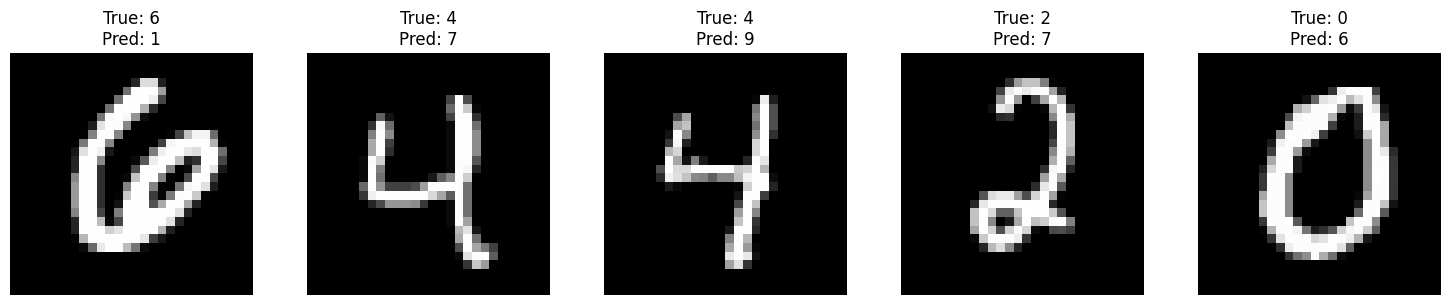

In [20]:
import random

# Select random samples for visualization
num_samples = 5
random_indices = random.sample(range(len(x_test_flat)), num_samples)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test_flat[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    pred_probs = model.predict(np.expand_dims(x_test_flat[idx], axis=0))
    pred_label = np.argmax(pred_probs)
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


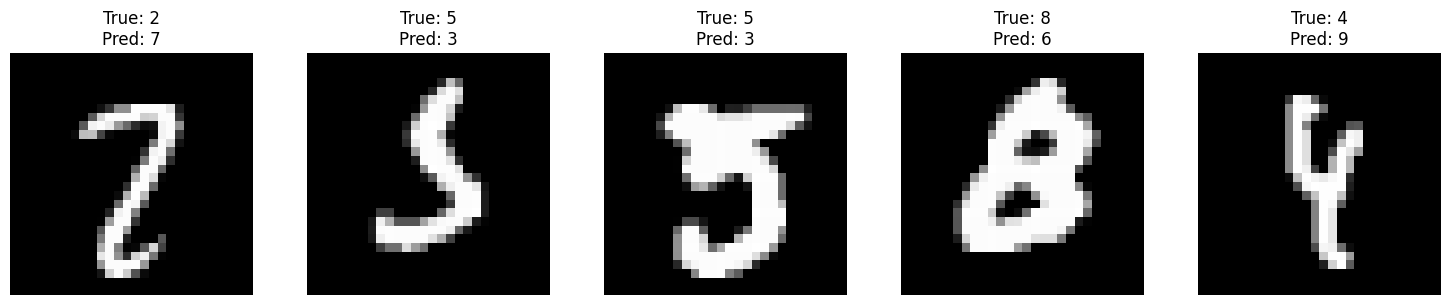

In [23]:
incorrect_indices = np.where(y_pred_classes != y_test)[0]
num_incorrect_samples = min(5, len(incorrect_indices))

plt.figure(figsize=(15, 3))
for i, idx in enumerate(incorrect_indices[:num_incorrect_samples]):
    plt.subplot(1, num_incorrect_samples, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


> B) Perform all above tasks with any preprocessing techniques.

> [1] Apply the convolution neural network architecture to the above dataset.


In [28]:
#Import Requests
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension for CNN input
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [29]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)


Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.1738 - accuracy: 0.9489 - val_loss: 0.0764 - val_accuracy: 0.9758
Epoch 2/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0358 - val_accuracy: 0.9875
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0301 - val_accuracy: 0.9899


In [30]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1]*100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 64)               

>  [2] Demonstrate the results with various learning rates.


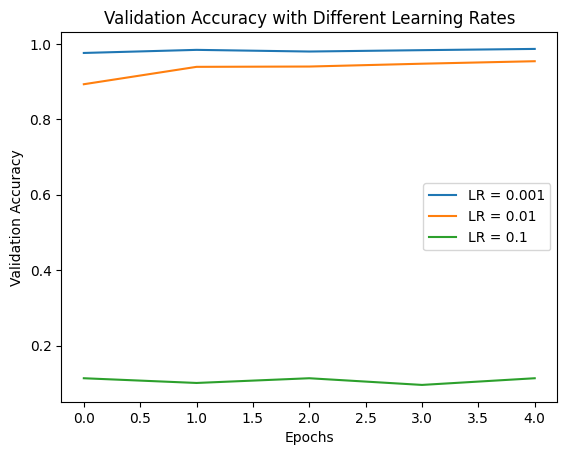

In [32]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to test

for lr in learning_rates:
    # Define CNN architecture
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Plot accuracy for each learning rate
    plt.plot(history.history['val_accuracy'], label=f'LR = {lr}')

plt.title('Validation Accuracy with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

> [3] Demonstrate the results with various Activation functions.<br>


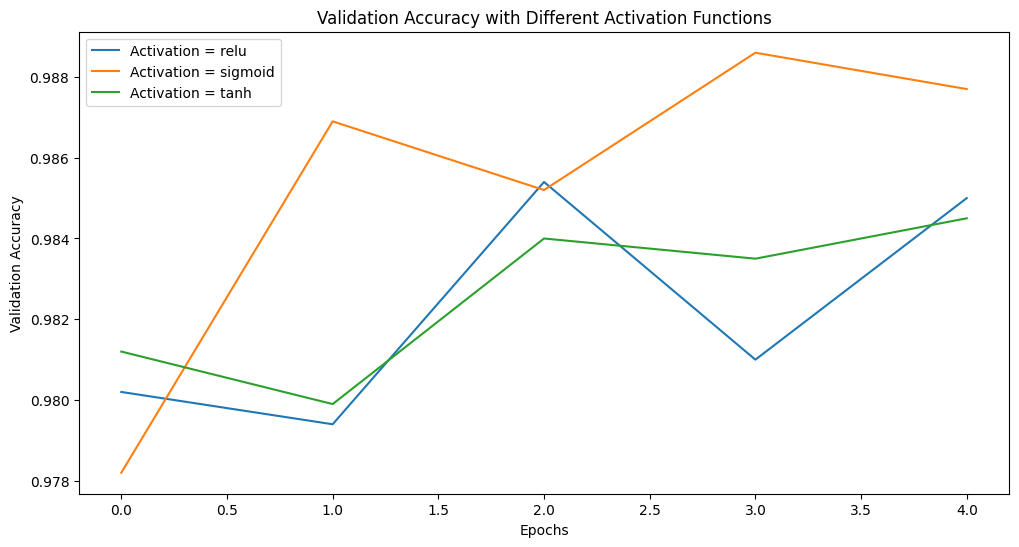

In [33]:
activation_functions = ['relu', 'sigmoid', 'tanh']

plt.figure(figsize=(12, 6))

for activation in activation_functions:
    # Define CNN architecture with the current activation function
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Plot validation accuracy for each activation function
    plt.plot(history.history['val_accuracy'], label=f'Activation = {activation}')

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

>  [4] Demonstrate the results with all possible evaluation criteria.

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential


# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes along axis 1
y_true = y_test  # Keep the true labels as they are

# Calculate evaluation metrics
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)], digits=4)
print(report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.9908    0.9929    0.9918       980
           1     0.9938    0.9938    0.9938      1135
           2     0.9846    0.9942    0.9894      1032
           3     0.9863    0.9950    0.9906      1010
           4     0.9928    0.9898    0.9913       982
           5     0.9810    0.9854    0.9832       892
           6     0.9916    0.9864    0.9890       958
           7     0.9912    0.9825    0.9868      1028
           8     0.9959    0.9918    0.9938       974
           9     0.9861    0.9822    0.9841      1009

    accuracy                         0.9895     10000
   macro avg     0.9894    0.9894    0.9894     10000
weighted avg     0.9895    0.9895    0.9895     10000



> [5] Demonstrate the learning results in all possible visualizing ways.


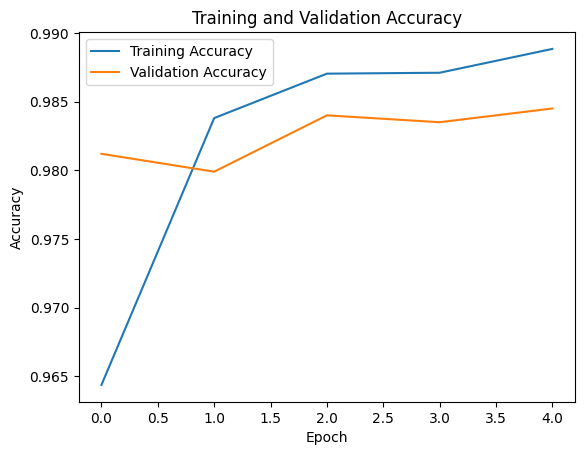

In [38]:
# Plot accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


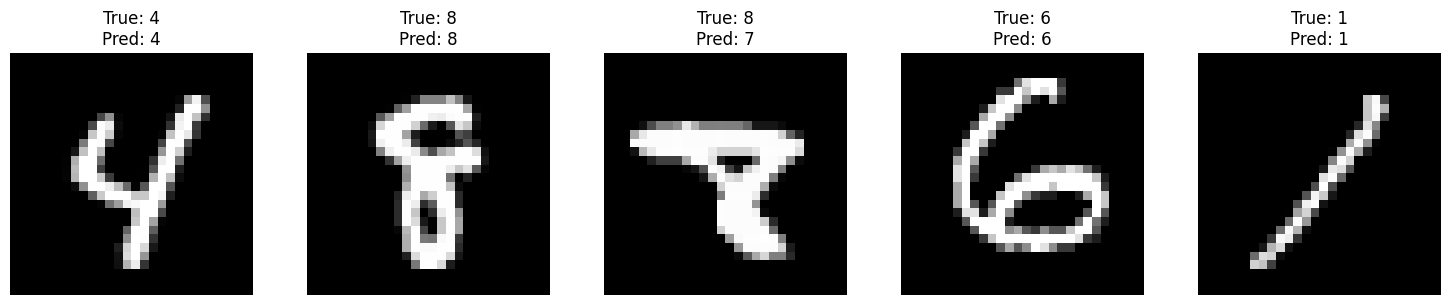

In [39]:
# Select random samples for visualization
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx, :, :, 0], cmap='gray')
    true_label = y_test[idx]
    pred_probs = model.predict(np.expand_dims(x_test[idx], axis=0))
    pred_label = np.argmax(pred_probs)
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


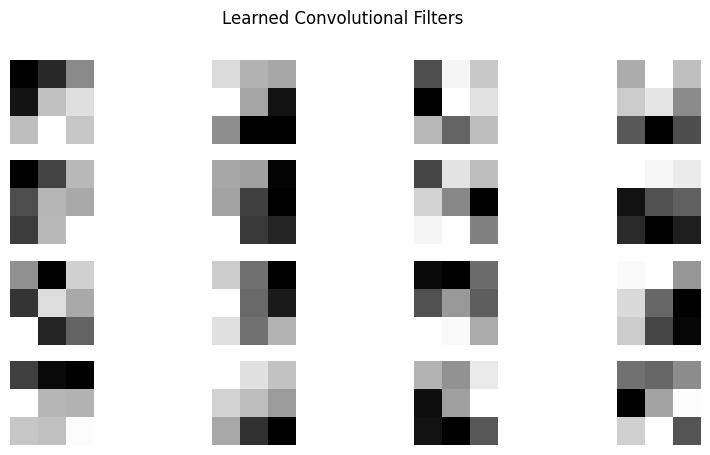

In [41]:
conv1_layer = model.get_layer('conv2d_28')
conv1_weights = conv1_layer.get_weights()[0]

plt.figure(figsize=(10, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(conv1_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Convolutional Filters')
plt.show()
